# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
units = "imperial"
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="

In [4]:
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speed = []
countries = []

count_one = 0
set_one = 1

for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | smithers
Processing Record 4 of Set 1 | taltal
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | hasaki
Processing Record 7 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 8 of Set 1 | ondo
Processing Record 9 of Set 1 | ambovombe
Processing Record 10 of Set 1 | codrington
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | abu dhabi
Processing Record 13 of Set 1 | pudozh
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | corinto
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | provideniya
Processing Record 19 of Set 1 | oriximina
Processing Record 20 of Set 1 | sinnar
Processing Record 21 of Set 1 | ostrovnoy
Processing Record 22 of Set 1 | praia
Processing Record 23 of Set 1 | port alfred
Processing Record 24 of Set 1 | evensk
City not 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speed
}

In [11]:
weather_df.to_csv(output_data_file)
weather_df.count()

City          558
Cloudiness    558
Country       558
Date          558
Humidity      558
Lat           558
Lng           558
Max Temp      558
Wind Speed    558
dtype: int64

In [7]:
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,avarua,100,CK,1575248537,83,-21.21,-159.78,77.00,10.29
1,mataura,89,NZ,1575248517,50,-46.19,168.86,66.99,5.99
2,smithers,75,CA,1575248406,79,54.78,-127.17,19.40,2.24
3,taltal,0,CL,1575248548,81,-25.41,-70.49,58.42,1.63
4,bredasdorp,78,ZA,1575248515,82,-34.53,20.04,64.99,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

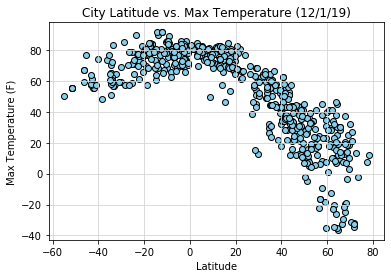

In [14]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (12/1/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

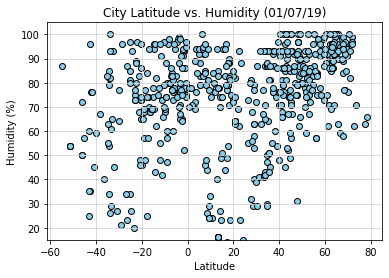

In [17]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

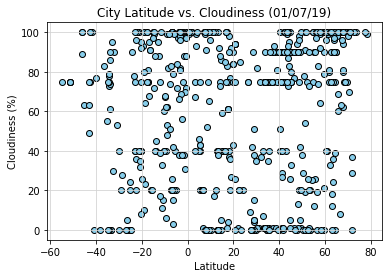

In [18]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

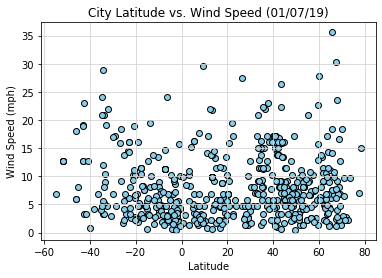

In [22]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig4.png")
plt.show()